In [159]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import random
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, f1_score
from prettytable import PrettyTable
from sklearn.metrics import roc_auc_score, classification_report
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import GridSearchCV

### Loading in diabetes dataset

In [160]:
from sklearn.datasets import load_diabetes

In [161]:
db_data = load_diabetes()
print(db_data.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [162]:
db_data.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [163]:
diabetes_df = pd.DataFrame(data= np.c_[db_data['data'], db_data['target']], columns = db_data['feature_names']+ ['target'])
diabetes_df.head(5)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


In [164]:
diabetes_df.isnull().sum()

age       0
sex       0
bmi       0
bp        0
s1        0
s2        0
s3        0
s4        0
s5        0
s6        0
target    0
dtype: int64

We see no missing data across our dataframe.

In [165]:
diabetes_df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-3.634285e-16,1.308343e-16,-8.045349e-16,1.281655e-16,-8.835316e-17,1.327024e-16,-4.574646e-16,3.777301e-16,-3.830854e-16,-3.412882e-16,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123996e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260974e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665645e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324879e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670611e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947634e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564384e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243323e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320442e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335990e-01,1.356118e-01,346.000000


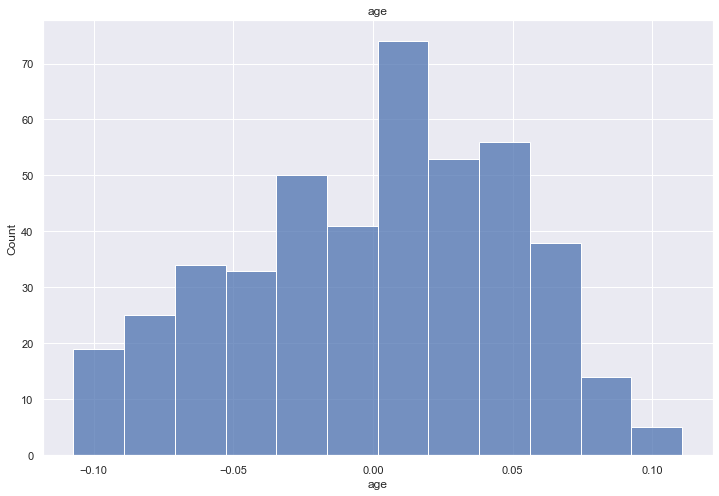

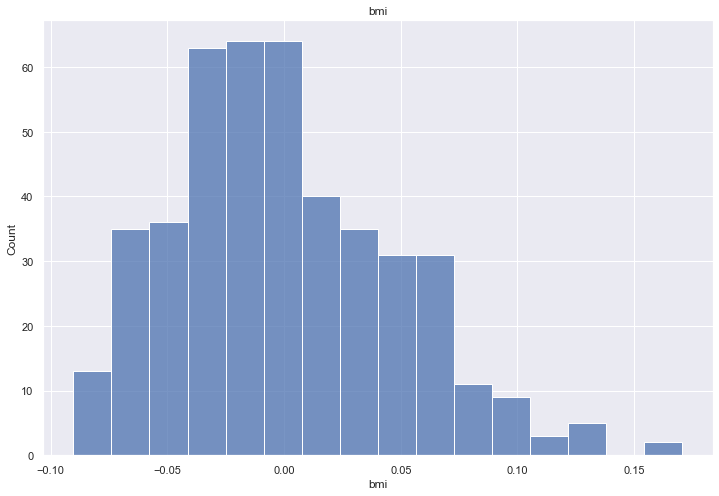

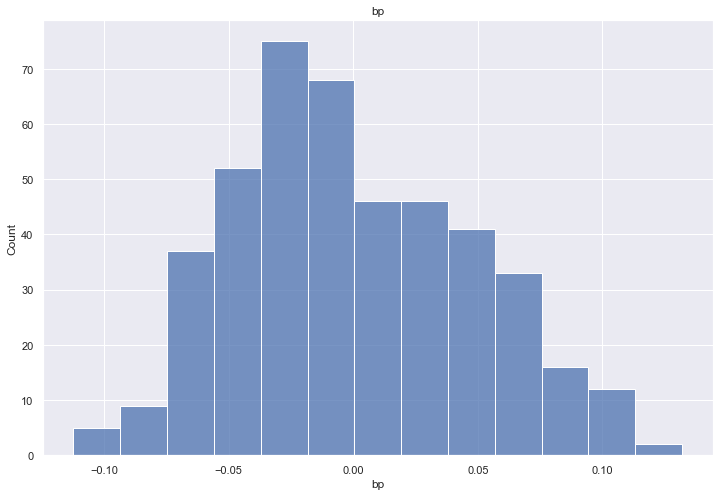

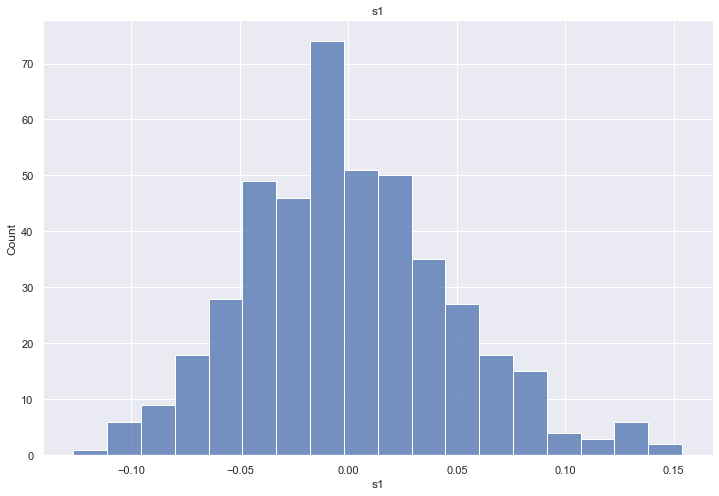

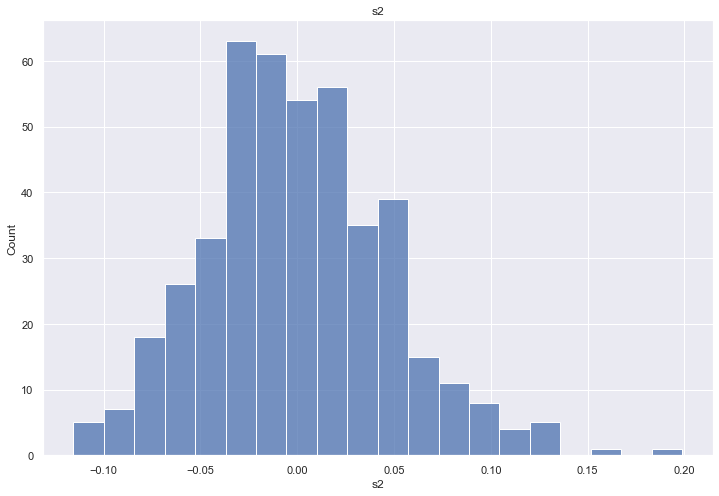

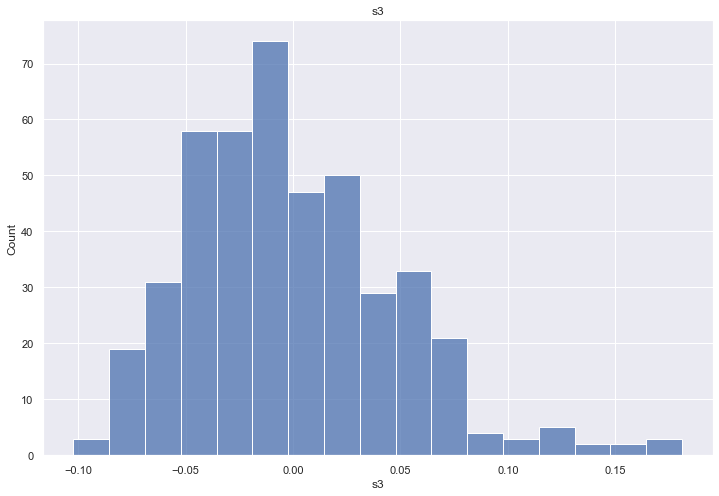

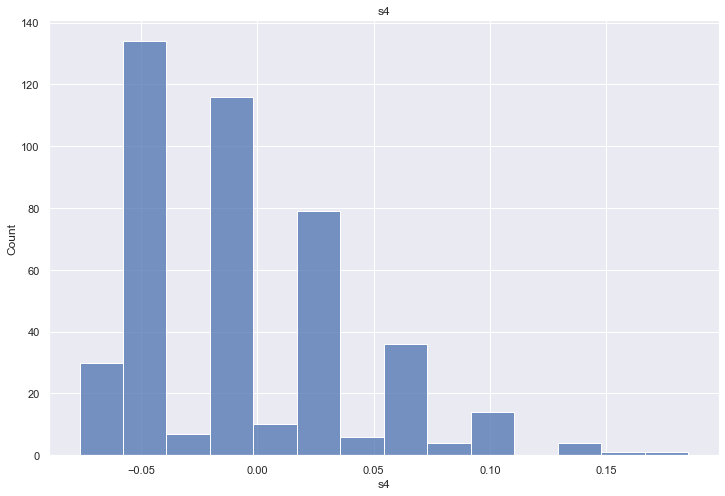

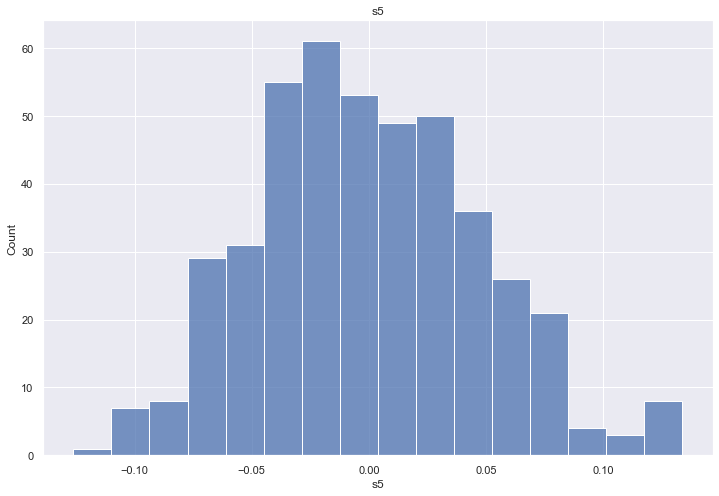

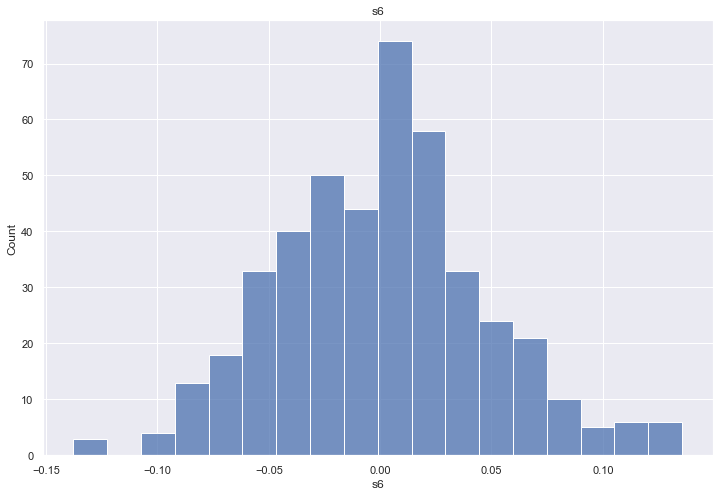

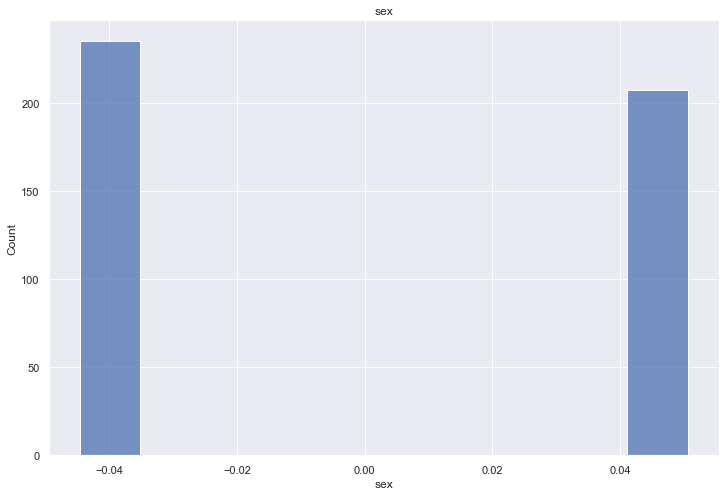

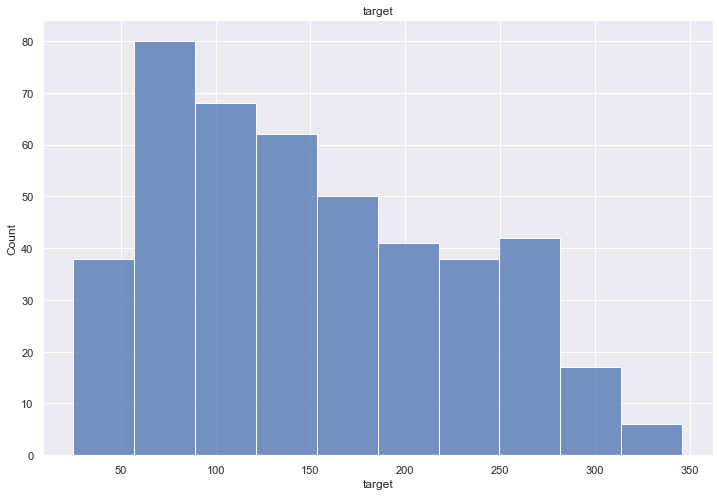

In [166]:
k = list(diabetes_df.keys())
for spec in sorted(k) :
    sn.histplot(data=diabetes_df, x=spec).set(title=spec)
    plt.show()

### Creating correlation matrix

Looking at the features highly correlated with the target variables

             age       sex       bmi        bp        s1        s2        s3  \
age     1.000000  0.173737  0.185085  0.335427  0.260061  0.219243 -0.075181   
sex     0.173737  1.000000  0.088161  0.241013  0.035277  0.142637 -0.379090   
bmi     0.185085  0.088161  1.000000  0.395415  0.249777  0.261170 -0.366811   
bp      0.335427  0.241013  0.395415  1.000000  0.242470  0.185558 -0.178761   
s1      0.260061  0.035277  0.249777  0.242470  1.000000  0.896663  0.051519   
s2      0.219243  0.142637  0.261170  0.185558  0.896663  1.000000 -0.196455   
s3     -0.075181 -0.379090 -0.366811 -0.178761  0.051519 -0.196455  1.000000   
s4      0.203841  0.332115  0.413807  0.257653  0.542207  0.659817 -0.738493   
s5      0.270777  0.149918  0.446159  0.393478  0.515501  0.318353 -0.398577   
s6      0.301731  0.208133  0.388680  0.390429  0.325717  0.290600 -0.273697   
target  0.187889  0.043062  0.586450  0.441484  0.212022  0.174054 -0.394789   

              s4        s5        s6   

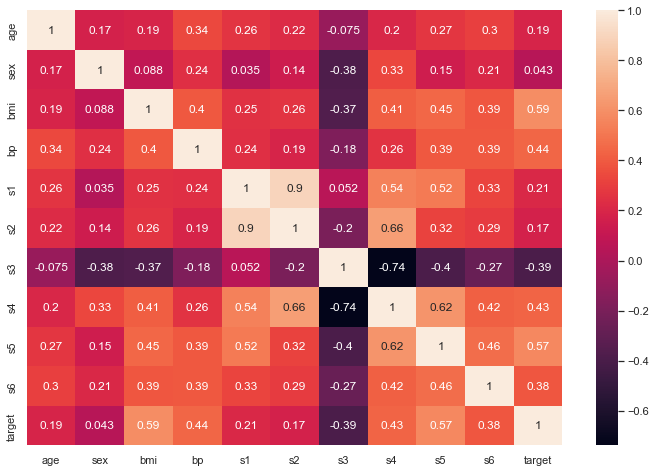

In [167]:
corrMatrix = diabetes_df.corr()
print (corrMatrix)
sn.set(rc={"figure.figsize":(12, 8)})
sn.heatmap(corrMatrix, annot=True)
plt.show()

Looking at the correlation heatplot map, we can see that the top three variables that are highly correlated with the target variable is bmi (0.59), s5 (0.57), and bp (0.44).

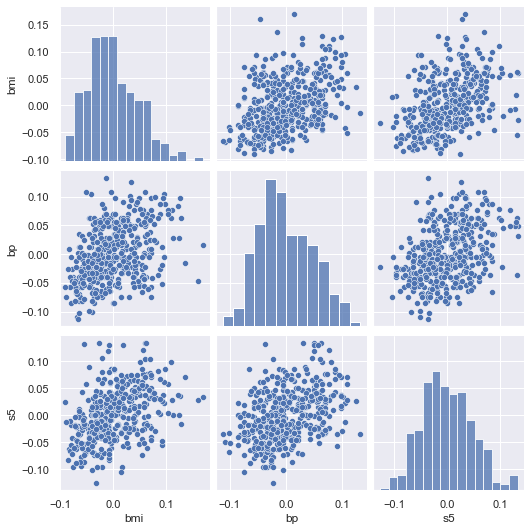

In [168]:
feature_df = diabetes_df[['bmi', 'bp', 's5']]
sn.pairplot(feature_df)
plt.show()

Looking at the pairplot, we can see that the distributions of the variables when compared to the others, look fairly distributed and there appears to be a possible relationship between the three feature selections. 

#### Splitting dataset into training and test set

In [169]:
from sklearn.model_selection import train_test_split

In [170]:
y = diabetes_df['target']
X = diabetes_df.drop('target', axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [171]:
X_train

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
17,0.070769,0.050680,0.012117,0.056301,0.034206,0.049416,-0.039719,0.034309,0.027368,-0.001078
66,-0.009147,0.050680,-0.018062,-0.033214,-0.020832,0.012152,-0.072854,0.071210,0.000271,0.019633
137,0.005383,-0.044642,0.049840,0.097616,-0.015328,-0.016345,-0.006584,-0.002592,0.017037,-0.013504
245,-0.027310,-0.044642,-0.035307,-0.029771,-0.056607,-0.058620,0.030232,-0.039493,-0.049868,-0.129483
31,-0.023677,-0.044642,-0.065486,-0.081414,-0.038720,-0.053610,0.059685,-0.076395,-0.037128,-0.042499
...,...,...,...,...,...,...,...,...,...,...
106,-0.096328,-0.044642,-0.076264,-0.043542,-0.045599,-0.034821,0.008142,-0.039493,-0.059473,-0.083920
270,0.005383,0.050680,0.030440,0.083844,-0.037344,-0.047347,0.015505,-0.039493,0.008640,0.015491
348,0.030811,-0.044642,-0.020218,-0.005671,-0.004321,-0.029497,0.078093,-0.039493,-0.010904,-0.001078
435,-0.012780,-0.044642,-0.023451,-0.040099,-0.016704,0.004636,-0.017629,-0.002592,-0.038459,-0.038357


In [172]:
X_test

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
287,0.045341,-0.044642,-0.006206,-0.015999,0.125019,0.125198,0.019187,0.034309,0.032433,-0.005220
211,0.092564,-0.044642,0.036907,0.021872,-0.024960,-0.016658,0.000779,-0.039493,-0.022512,-0.021788
72,0.063504,0.050680,-0.004050,-0.012556,0.103003,0.048790,0.056003,-0.002592,0.084495,-0.017646
321,0.096197,-0.044642,0.051996,0.079254,0.054845,0.036577,-0.076536,0.141322,0.098646,0.061054
73,0.012648,0.050680,-0.020218,-0.002228,0.038334,0.053174,-0.006584,0.034309,-0.005145,-0.009362
...,...,...,...,...,...,...,...,...,...,...
255,0.001751,-0.044642,-0.065486,-0.005671,-0.007073,-0.019476,0.041277,-0.039493,-0.003304,0.007207
90,0.012648,-0.044642,-0.025607,-0.040099,-0.030464,-0.045155,0.078093,-0.076395,-0.072128,0.011349
57,-0.027310,-0.044642,-0.063330,-0.050428,-0.089630,-0.104340,0.052322,-0.076395,-0.056158,-0.067351
391,-0.023677,-0.044642,-0.069797,-0.064199,-0.059359,-0.050478,0.019187,-0.039493,-0.089137,-0.050783


In [173]:
y_train

17     144.0
66     150.0
137    280.0
245    125.0
31      59.0
       ...  
106    134.0
270    202.0
348    148.0
435     64.0
102    302.0
Name: target, Length: 353, dtype: float64

In [174]:
y_test

287    219.0
211     70.0
72     202.0
321    230.0
73     111.0
       ...  
255    153.0
90      98.0
57      37.0
391     63.0
24     184.0
Name: target, Length: 89, dtype: float64

# Part 2
Model Training. Train a linear regression model usingyour training set. Print the RMSE of your regression model on your training set. Implement a cross_val_score on a decision tree regressor on your training set. Print out root mean and standard deviation of the cross-validation scores. Dothesame for a RandomForestRegressor. Record which model performs better. 

### Regression Models

In [175]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
bb
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

In [176]:
random.seed(3254)

#Linear Regression Model
print("LinearRegression()")
lm = LinearRegression()
lm.fit(X_train, y_train)
preds_train = lm.predict(X_train)
rmse = mean_squared_error(y_train, preds_train, squared=False)
print('RMSE:\n', rmse)

#DecisionTreeRegressor
print()
print('DecisionTreeRegressor()')
dtr = DecisionTreeRegressor()
dtr.fit(X, y)
scores = cross_val_score(dtr, X_train, y_train)
scores
rmse = cross_val_score(dtr, X_train, y_train, scoring="neg_root_mean_squared_error")
rmse = -rmse
print("Standard Deviation:\n", scores.std())
print("RMSE mean:\n", rmse.mean())

#Random
print()
print('RandomForestRegressor()')
rfr = RandomForestRegressor()
rfr.fit(X, y)
scores = cross_val_score(rfr, X_train, y_train)
scores
rmse = cross_val_score(rfr, X_train, y_train, scoring="neg_root_mean_squared_error")
rmse = -rmse
print("Standard Deviation:\n", scores.std())
print("RMSE mean:\n", rmse.mean())

LinearRegression()
RMSE:
 53.55881425327268

DecisionTreeRegressor()
Standard Deviation:
 0.2669743949360603
RMSE mean:
 80.4189580716996

RandomForestRegressor()
Standard Deviation:
 0.14892281070240398
RMSE mean:
 58.6938394072835


When looking at the RMSE, Linear Regression has the lowest RMSE (53.5588), making it the best model. Next best is the RandomForestRegressor with 58.6938, then DecisionTreeRegressor with 80.41896.

# Part 3
Model Tuning. Print out the parameters of your randomforest model. Do a grid search cross-validation with the following values:
n_estimators: 3,10,30 and max_features: 2,4,6,8, as well as the following experiment: bootstrap: False, n_estimators: 3,10 and max_features: 2,3,4. Print out the best parameters and the best performing model based on this gridsearch. Using the cv_results dictionary, print out the rmse of each feature combination for comparison. Also print out the feature importances of the best performing grid search model. Describe how it compares with the correlation matrix we implemented earlier.

In [177]:
from sklearn.model_selection import GridSearchCV
# Printing parameters of my RandomForestRegressor model that was trained.
rfr.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

#### Grid search cross-validation on first new parameters

In [189]:
new_params = [{'n_estimators': [3,10,30], 'max_features': [2,4,6,8]}, 
              {'bootstrap': [False], 'n_estimators': [3,10], 'max_features': [2,3,4]}]
grid_cv_new = GridSearchCV(estimator = rfr, param_grid = new_params, scoring="neg_root_mean_squared_error")
grid_cv_new.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             scoring='neg_root_mean_squared_error')

In [1]:
print(grid_cv_new.best_params_)
print(grid_cv_new.best_estimator_)

NameError: name 'grid_cv_new' is not defined

The best estimator is a RandomForestRegressor with 4 max_features, and 30 n_estimators. 

In [191]:
cv_new = grid_cv_new.cv_results_
for root_mean_score, params in zip(cv_new['mean_test_score'], cv_new['params']):
    print(params, (-root_mean_score))

{'max_features': 2, 'n_estimators': 3} 69.83167195440878
{'max_features': 2, 'n_estimators': 10} 61.97102348430466
{'max_features': 2, 'n_estimators': 30} 59.31194563560415
{'max_features': 4, 'n_estimators': 3} 65.03917185540834
{'max_features': 4, 'n_estimators': 10} 60.75440316883028
{'max_features': 4, 'n_estimators': 30} 58.75685304300506
{'max_features': 6, 'n_estimators': 3} 70.76636195964602
{'max_features': 6, 'n_estimators': 10} 60.81142238506484
{'max_features': 6, 'n_estimators': 30} 59.40772615520757
{'max_features': 8, 'n_estimators': 3} 67.91349320204179
{'max_features': 8, 'n_estimators': 10} 59.886709498960364
{'max_features': 8, 'n_estimators': 30} 58.83017962837441
{'bootstrap': False, 'max_features': 2, 'n_estimators': 3} 67.08741023382109
{'bootstrap': False, 'max_features': 2, 'n_estimators': 10} 59.92788947010606
{'bootstrap': False, 'max_features': 3, 'n_estimators': 3} 67.69557974537312
{'bootstrap': False, 'max_features': 3, 'n_estimators': 10} 60.837059798413

In [192]:
feats_imp = grid_cv_new.best_estimator_.feature_importances_
sorted(zip(X_train.columns, feats_imp), key = lambda a: a[1], reverse = True)

[('bmi', 0.2726318199984239),
 ('s5', 0.20641903547718848),
 ('bp', 0.11411348131021548),
 ('s6', 0.08667455902298657),
 ('s3', 0.07001326508796385),
 ('s2', 0.06391986676210101),
 ('s1', 0.06091999663896071),
 ('s4', 0.05960336673976936),
 ('age', 0.05548953187275787),
 ('sex', 0.01021507708963267)]

When looking at the feature importances for the best performing grid search model, we see that the highest feature importances match what we found in the correlation matrix. BP, BMI, and s5 are the top three features. 

# Part 4
Model Evaluation. Document the best-performing model between the single feature model you trained in Assignment 1, and the models you trained in part 2 and 3 of this assignment. Evaluate the best performing model against your test set. Save your model for future use.

In [206]:
# Evalutating the new RandomForestRegressor model
rfr_new = grid_cv_new.best_estimator_
rfr_new.fit(X_train, y_train)
rpreds_test = rfr_new.predict(X_test)
r_rmse = mean_squared_error(y_test, rpreds_test, squared=False)
print("RandomForestRegressor with 4 max_features, and 30 n_estimators, RMSE: ", r_rmse)


# Evalutating the LinearRegression model with test set
lmpreds_test = lm.predict(X_test)
lm_rmse = mean_squared_error(y_test, lmpreds_test, squared=False)
print("LinearRegression selected from Part 2, RMSE: ", lm_rmse)

# Linear model with s6 feature from Assignment 1
print("Linear model with s6 as feature, RMSE: 71.550059")

RandomForestRegressor with 4 max_features, and 30 n_estimators, RMSE:  55.4514347017901
LinearRegression selected from Part 2, RMSE:  53.853256984914395
Linear model with s6 as feature, RMSE: 71.550059


Looking at our new RandomForestRegessor model with 4 max features, and 30 n_estimators, we obtained an RMSE of 55.4514. While this did improve from our RandomForestRegessor model in part 2 (RMSE: 58.6938), LinearRegression still has the lowest RMSE (53.85325), and is the best performing model against the test set. 